<a href="https://colab.research.google.com/github/dvisionst/Project_Two/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two
- Jose Flores
- 12 August 2022

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl

In [65]:
df = pd.read_csv('/content/neo.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


1) Source of data
*NASA via Kaggle*

2) Brief description of data
*This data set shows a large number of near earth asteroids, and their attributes. It displays size, velocity, disstance and if it's hazardous*

3) What is the target?
*The 'hazardous' column is the target*

4) Is this a classification or regression problem?
*This is a classification problem*

5) How many features?
*There are 10 columns with one being an ID column.*

6) How many rows of data.
*90,835 rows*

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

*This is a very large data set, hypertuning parameters and going through differnet models will be a more time consuming process. *

I chose this data set because I have always been interested in space.I'm extremely curious to know what data we have collected in terms of near earth objects. I think that as a society any sizable asteriod impact would be apocalyptic. This makes identifying as many hazardous objects near Earth a very important task. The next would be how to prevent the collision. For now i want to explore this data set for myself. 

# Part Two

In [67]:
# I'm making the decision to drop the id and name columns from the df. These 
# columns are just used so scientist can label the different NEOs. They won't
# have an impact in my classification problem.

df.drop(columns=['id', 'name'], inplace=True)
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [68]:
# looking for duplicated rows, dropping them, and veryfing zero duplicates.

print(df.duplicated().sum(), '\n\n')
df.drop_duplicates(inplace=True)
df.duplicated().sum()

7 




0

In [69]:
# Looking for missing values

df.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [70]:
# Looking for inconsistent categorical values in orbiting body column
# It is the only column that is an object data type.

print(df['orbiting_body'].value_counts())

# The orbiting body only has one which is Earth, Since this is the case, will be
# dropping the entire column because it's not informing anything.

df.drop(columns='orbiting_body', inplace=True)
df.head()

Earth    90829
Name: orbiting_body, dtype: int64


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True


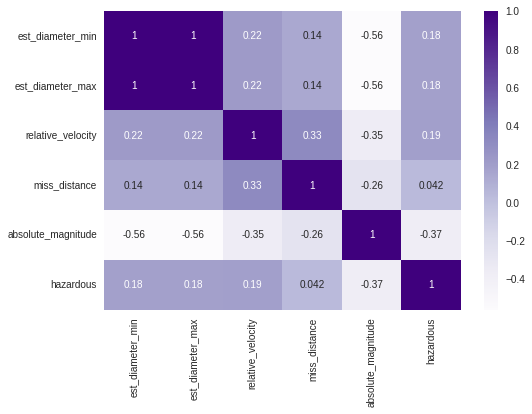

In [72]:
# creating heatmap to see any possible correlations
df2 = df.copy()
df2.drop(columns='sentry_object', inplace=True)
correlations = df2.corr();
sns.heatmap(correlations, cmap='Purples' , annot=True);


The data set shows a low correlation between miss_distance and relative_velocity
It also has some negative correlations. Moderate negative correlations between absolute_magnitude and both diameter min and max features. It also has a low negative correlation between relative velocity and absolute magnitude. 

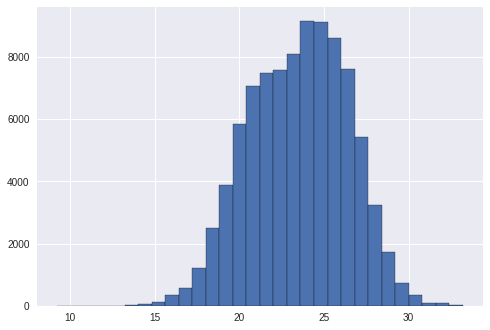

In [73]:
plt.style.use('seaborn')
df['absolute_magnitude'].hist(bins=30, edgecolor='black');

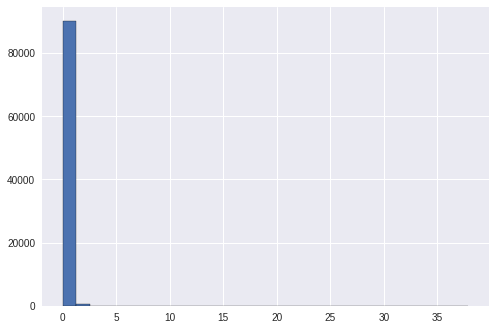

In [90]:
#min diameter is heavily skewed.
plt.style.use('seaborn')
df['est_diameter_min'].hist(bins=30, edgecolor='black');

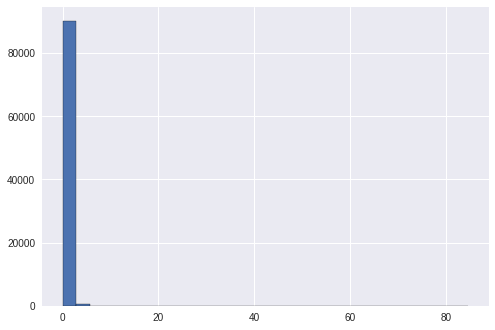

In [75]:
#max diameter is also heavily skewed.
plt.style.use('seaborn')
df['est_diameter_max'].hist(bins=30, edgecolor='black');

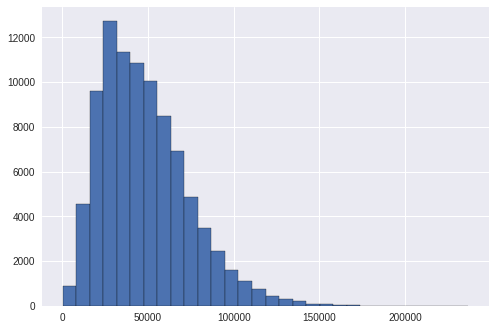

In [78]:
# relative velocity has more of a normal distribution but it still
# skews to the left. 
plt.style.use('seaborn')
df['relative_velocity'].hist(bins=30, edgecolor='black');

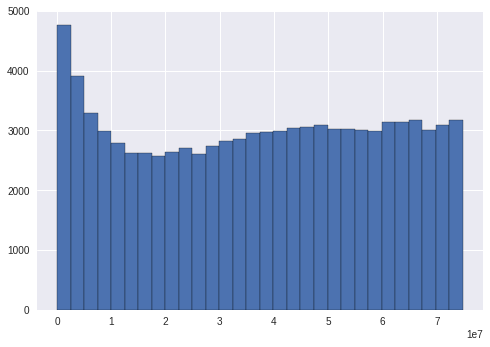

In [79]:
# relative velocity has more of a normal distribution but it still
# skews to the left. 
plt.style.use('seaborn')
df['miss_distance'].hist(bins=30, edgecolor='black');

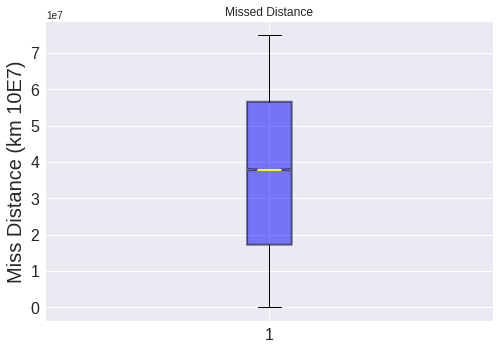

In [99]:
# creating a boxplot for miss distance
miss_d = df['miss_distance']
plt.boxplot([miss_d],
                        notch=True,
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Miss Distance (km 10E7)', fontsize = 20);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Missed Distance');

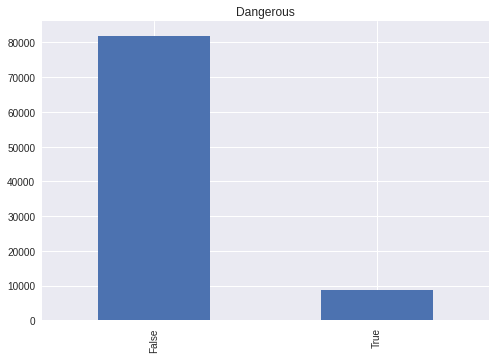

In [82]:
# plotting the target vector which is a boolean. Is it dangerous/hazardous,
# or is it not. 
df['hazardous'].value_counts().plot(kind='bar', title='Dangerous');